**Import** **Libraries**

In [3]:
#!pip3 install torch torchvision

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print("List of files",os.listdir("../input"))
import torch
import numpy as np
print("Torch Version:",torch.__version__)
# Any results you write to the current directory are saved as output.

Torch Version: 1.3.1


**Helper** **Function**

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()


In [5]:
features=torch.randn(1,3)
print(f'Number of Inout features:{features.shape[1]}')
n_input=features.shape[1]   #3 input neuron
n_hidden=2     #two hidden neuron
n_output=1     #one output neuron
#Weights for input to hidden layer
W1=torch.randn(n_input,n_hidden)
W2=torch.randn(n_hidden,n_output)
#Bias term for hidden and output layer
B1=torch.randn(n_hidden)
B2=torch.randn(n_output)

Number of Inout features:3


In [0]:
#Using a Sigmoid Activation Function
def activation(x):
    return(1/1+torch.exp(-x))

In [7]:
h1=activation(torch.matmul(features,W1)+B1)
print(f'Hidden Layer activations:{h1}')
out=activation(torch.matmul(h1,W2)+B2)
print(f'Output of the network:{out}')

Hidden Layer activations:tensor([[ 1.3230, 99.3338]])
Output of the network:tensor([[4078836.5000]])


###Building our Network


Now we're going to build a larger network that can solve a (formerly) difficult problem, identifying text in an image using MNIST data For now our goal will be to build a neural network that can take one of these images and predict the digit in the image.First, let's try to build this network for this dataset using weight matrices and matrix multiplications. Then, we'll see how to do it using PyTorch's nn module which provides a much more convenient and powerful method for defining network architectures.

In [0]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import helper
import matplotlib.pyplot as plt

### Load Dataset 
First up, we need to get our dataset.Right now we will be using MNIST dataset which is already in`torchvision` package. The code below will download the MNIST dataset, then create training and test datasets for us. 


In [9]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              ])

# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

9920512it [00:01, 8435514.52it/s]                            


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 136662.30it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw


1654784it [00:00, 2318800.07it/s]                            
0it [00:00, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


8192it [00:00, 54296.66it/s]            


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw
Processing...
Done!


In [10]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)
#Printing the size of one image
print(images[1].numpy().squeeze().shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])
(28, 28)


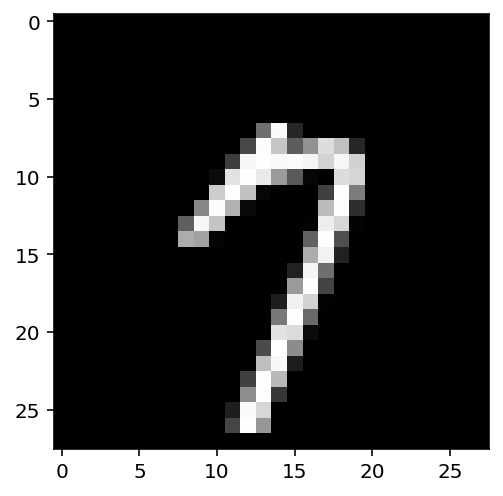

In [11]:
#Look at the image
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [0]:
#Sigmoid Activation Function
def activation(x):
    return (1/(1+torch.exp(-x)))

#Input 64x784
inputs=images.view(images.shape[0],-1)
#Number of input features-784
n_input=inputs.shape[1]
#Number of neurons in hidden layer-256
n_hidden=256
#Number of output neuron-10
n_out=10
#Weight at hidden neuron-784x256
W1=torch.randn(n_input,n_hidden)
#Bias at hidden neuron-256
B1=torch.randn(n_hidden)
#Weight at output neuron-256x10
W2=torch.randn(n_hidden,n_out)
#Bias at output neuron-10
B2=torch.randn(n_out)


In [13]:
print("Shape of a batch of an image:",images.shape)
print("Shape of the input to the network:",inputs.shape)
print("Shape of the input features:",n_input)
print("Shape of the Weight matrix of neurons in the hidden layer",W1.shape)
print("Shape of the Bias vector of neurons in the hidden layer",B1.shape)
print("Shape of the Weight matrix of neurons in the output layer",W2.shape)
print("Shape of the Bias vector of neurons in the output layer",B2.shape)


Shape of a batch of an image: torch.Size([64, 1, 28, 28])
Shape of the input to the network: torch.Size([64, 784])
Shape of the input features: 784
Shape of the Weight matrix of neurons in the hidden layer torch.Size([784, 256])
Shape of the Bias vector of neurons in the hidden layer torch.Size([256])
Shape of the Weight matrix of neurons in the output layer torch.Size([256, 10])
Shape of the Bias vector of neurons in the output layer torch.Size([10])


In [0]:
#Hidden layer activations
h1=activation(torch.mm(inputs,W1)+B1)
#Output layer activations
out=activation(torch.mm(h1,W2)+B2)

In [15]:
print(f'Shape of the Hidden activation of the network{h1.shape}')
print(f'Shape of the Output of the network{out.shape}')

Shape of the Hidden activation of the networktorch.Size([64, 256])
Shape of the Output of the networktorch.Size([64, 10])


In [16]:
#Let us see the network output to one of the feeded input image
out[1]

tensor([8.8146e-01, 2.0596e-07, 1.8745e-01, 4.6168e-04, 4.4423e-04, 6.6391e-08,
        9.7014e-01, 9.9996e-01, 1.0000e+00, 9.9992e-01])


### Probability Distribution using Softmax
To calculate this probability distribution, we often use the [softmax function](https://en.wikipedia.org/wiki/Softmax_function)
$$
\Large \sigma(x_i) = \cfrac{e^{x_i}}{\sum_k^K{e^{x_k}}}
$$
What this does is squish each input $x_i$ between 0 and 1 and normalizes the values to give you a proper probability distribution where the probabilites sum up to one.

In [0]:
def softmax(x):
    return(torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1))

In [18]:
probabilities = softmax(out)
# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


MULTILAYERED NETWORK



We will be using ReLU() activation function

In [0]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets,transforms

In [0]:
transform=transforms.Compose([transforms.ToTensor()])
trainset=datasets.MNIST('~/.pytorch/MNIST_data/',train=True,transform=transform,download=True)
testset=datasets.MNIST('~/.pytorch/MNIST_data/',train=False,transform=transform,download=True)

trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True,num_workers=0)
#will explain later
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True,num_workers=0)

Model-with 3 hidden layer

In [93]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # Dropout module with 0.1 drop probability
        self.dropout = nn.Dropout(p=0.1)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x
        
model=Network()
optimizer=optim.SGD(model.parameters(),lr=0.05)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        optimizer.zero_grad()
        #images=images.view(images.shape[0],-1)
        log_ps=model(images)
        loss=criterion(log_ps,labels) # a single value for ex 2.33
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.shape[0] ## (2.33*64 + 2.22*64 + 2.12*33) / 138 
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in testloader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) *images.shape[0]
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.sum(equals).item()
        model.train()
        train_losses.append(running_loss/len(trainloader.dataset))
        test_losses.append(test_loss.item()/len(testloader.dataset))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader.dataset)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader.dataset)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader.dataset)))  
print("Total_parameters: {:.3f}.. ".format(sum(p.numel() for p in model.parameters())))  

Epoch: 1/10..  Training Loss: 1.049..  Test Loss: 0.319..  Test Accuracy: 0.908
Epoch: 2/10..  Training Loss: 0.304..  Test Loss: 0.197..  Test Accuracy: 0.942
Epoch: 3/10..  Training Loss: 0.198..  Test Loss: 0.165..  Test Accuracy: 0.949
Epoch: 4/10..  Training Loss: 0.150..  Test Loss: 0.108..  Test Accuracy: 0.969
Epoch: 5/10..  Training Loss: 0.121..  Test Loss: 0.094..  Test Accuracy: 0.971
Epoch: 6/10..  Training Loss: 0.101..  Test Loss: 0.085..  Test Accuracy: 0.975
Epoch: 7/10..  Training Loss: 0.088..  Test Loss: 0.082..  Test Accuracy: 0.975
Epoch: 8/10..  Training Loss: 0.076..  Test Loss: 0.079..  Test Accuracy: 0.975
Epoch: 9/10..  Training Loss: 0.068..  Test Loss: 0.078..  Test Accuracy: 0.976
Epoch: 10/10..  Training Loss: 0.061..  Test Loss: 0.073..  Test Accuracy: 0.979
Total_parameters: 242762.000.. 


In [94]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x
        
model=Network()
optimizer=optim.SGD(model.parameters(),lr=0.05)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        optimizer.zero_grad()
        #images=images.view(images.shape[0],-1)
        log_ps=model(images)
        loss=criterion(log_ps,labels) # a single value for ex 2.33
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.shape[0] ## (2.33*64 + 2.22*64 + 2.12*33) / 138 
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model.eval()
            for images,labels in testloader:
                log_ps=model(images)
                test_loss+=criterion(log_ps,labels) *images.shape[0]
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.sum(equals).item()
        model.train()
        train_losses.append(running_loss/len(trainloader.dataset))
        test_losses.append(test_loss.item()/len(testloader.dataset))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader.dataset)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader.dataset)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader.dataset)))  
print("Total_parameters: {:.3f}.. ".format(sum(p.numel() for p in model.parameters())))  

Epoch: 1/10..  Training Loss: 1.080..  Test Loss: 0.325..  Test Accuracy: 0.904
Epoch: 2/10..  Training Loss: 0.340..  Test Loss: 0.201..  Test Accuracy: 0.940
Epoch: 3/10..  Training Loss: 0.233..  Test Loss: 0.147..  Test Accuracy: 0.956
Epoch: 4/10..  Training Loss: 0.181..  Test Loss: 0.124..  Test Accuracy: 0.963
Epoch: 5/10..  Training Loss: 0.151..  Test Loss: 0.107..  Test Accuracy: 0.967
Epoch: 6/10..  Training Loss: 0.129..  Test Loss: 0.100..  Test Accuracy: 0.970
Epoch: 7/10..  Training Loss: 0.114..  Test Loss: 0.086..  Test Accuracy: 0.973
Epoch: 8/10..  Training Loss: 0.101..  Test Loss: 0.079..  Test Accuracy: 0.976
Epoch: 9/10..  Training Loss: 0.092..  Test Loss: 0.077..  Test Accuracy: 0.977
Epoch: 10/10..  Training Loss: 0.083..  Test Loss: 0.085..  Test Accuracy: 0.974
Total_parameters: 242762.000.. 


Model_2 with 2 hidden layers

In [105]:
transform=transforms.Compose([transforms.ToTensor()])
trainset=datasets.MNIST('~/.pytorch/MNIST_data/',train=True,transform=transform,download=True)
testset=datasets.MNIST('~/.pytorch/MNIST_data/',train=False,transform=transform,download=True)

trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True,num_workers=0)
#will explain later
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True,num_workers=0)
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        #self.fc4 = nn.Linear(64, 10)

        # Dropout module with 0.1 drop probability
        self.dropout = nn.Dropout(p=0.1)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        #x = self.dropout(F.relu(self.fc3(x)))

        # output so no dropout here
        x = F.log_softmax(self.fc3(x), dim=1)

        return x
        
model_2=Network()
optimizer=optim.SGD(model_2.parameters(),lr=0.05)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        optimizer.zero_grad()
        #images=images.view(images.shape[0],-1)
        log_ps=model_2(images)
        loss=criterion(log_ps,labels) # a single value for ex 2.33
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.shape[0] ## (2.33*64 + 2.22*64 + 2.12*33) / 138 
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model_2.eval()
            for images,labels in testloader:
                log_ps=model_2(images)
                test_loss+=criterion(log_ps,labels) *images.shape[0]
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.sum(equals).item()
        model_2.train()
        train_losses.append(running_loss/len(trainloader.dataset))
        test_losses.append(test_loss.item()/len(testloader.dataset))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader.dataset)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader.dataset)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader.dataset))) 
        #print("Our model: \n\n", model_2, '\n'),
print("Total_parameters: {:.3f}.. ".format(sum(p.numel() for p in model_2.parameters())))
        #pytorch_total_params = sum(p.numel() for p in model.parameters())
        #pytorch_total_params   

Epoch: 1/10..  Training Loss: 0.709..  Test Loss: 0.315..  Test Accuracy: 0.905
Epoch: 2/10..  Training Loss: 0.285..  Test Loss: 0.209..  Test Accuracy: 0.937
Epoch: 3/10..  Training Loss: 0.208..  Test Loss: 0.154..  Test Accuracy: 0.955
Epoch: 4/10..  Training Loss: 0.163..  Test Loss: 0.129..  Test Accuracy: 0.961
Epoch: 5/10..  Training Loss: 0.134..  Test Loss: 0.126..  Test Accuracy: 0.960
Epoch: 6/10..  Training Loss: 0.115..  Test Loss: 0.092..  Test Accuracy: 0.971
Epoch: 7/10..  Training Loss: 0.100..  Test Loss: 0.086..  Test Accuracy: 0.974
Epoch: 8/10..  Training Loss: 0.088..  Test Loss: 0.080..  Test Accuracy: 0.977
Epoch: 9/10..  Training Loss: 0.079..  Test Loss: 0.071..  Test Accuracy: 0.977
Epoch: 10/10..  Training Loss: 0.071..  Test Loss: 0.071..  Test Accuracy: 0.977
Total_parameters: 235146.000.. 


In [106]:
transform=transforms.Compose([transforms.ToTensor()])
trainset=datasets.MNIST('~/.pytorch/MNIST_data/',train=True,transform=transform,download=True)
testset=datasets.MNIST('~/.pytorch/MNIST_data/',train=False,transform=transform,download=True)

trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True,num_workers=0)
#will explain later
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True,num_workers=0)
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        #self.fc4 = nn.Linear(64, 10)

        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        #x = self.dropout(F.relu(self.fc3(x)))

        # output so no dropout here
        x = F.log_softmax(self.fc3(x), dim=1)

        return x
        
model_2=Network()
optimizer=optim.SGD(model_2.parameters(),lr=0.05)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        optimizer.zero_grad()
        #images=images.view(images.shape[0],-1)
        log_ps=model_2(images)
        loss=criterion(log_ps,labels) # a single value for ex 2.33
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.shape[0] ## (2.33*64 + 2.22*64 + 2.12*33) / 138 
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model_2.eval()
            for images,labels in testloader:
                log_ps=model_2(images)
                test_loss+=criterion(log_ps,labels) *images.shape[0]
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.sum(equals).item()
        model_2.train()
        train_losses.append(running_loss/len(trainloader.dataset))
        test_losses.append(test_loss.item()/len(testloader.dataset))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader.dataset)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader.dataset)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader.dataset))) 
        #print("Our model: \n\n", model_2, '\n'),
print("Total_parameters: {:.3f}.. ".format(sum(p.numel() for p in model_2.parameters())))
        #pytorch_total_params = sum(p.numel() for p in model.parameters())
        #pytorch_total_params   

Epoch: 1/10..  Training Loss: 0.743..  Test Loss: 0.290..  Test Accuracy: 0.917
Epoch: 2/10..  Training Loss: 0.297..  Test Loss: 0.210..  Test Accuracy: 0.939
Epoch: 3/10..  Training Loss: 0.217..  Test Loss: 0.156..  Test Accuracy: 0.954
Epoch: 4/10..  Training Loss: 0.174..  Test Loss: 0.130..  Test Accuracy: 0.961
Epoch: 5/10..  Training Loss: 0.148..  Test Loss: 0.111..  Test Accuracy: 0.965
Epoch: 6/10..  Training Loss: 0.126..  Test Loss: 0.097..  Test Accuracy: 0.970
Epoch: 7/10..  Training Loss: 0.113..  Test Loss: 0.092..  Test Accuracy: 0.971
Epoch: 8/10..  Training Loss: 0.101..  Test Loss: 0.084..  Test Accuracy: 0.973
Epoch: 9/10..  Training Loss: 0.091..  Test Loss: 0.079..  Test Accuracy: 0.974
Epoch: 10/10..  Training Loss: 0.084..  Test Loss: 0.077..  Test Accuracy: 0.977
Total_parameters: 235146.000.. 


Model_1 with 1 hidden layer

In [157]:
transform=transforms.Compose([transforms.ToTensor()])
trainset=datasets.MNIST('~/.pytorch/MNIST_data/',train=True,transform=transform,download=True)
testset=datasets.MNIST('~/.pytorch/MNIST_data/',train=False,transform=transform,download=True)

trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True,num_workers=0)
#will explain later
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True,num_workers=0)
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 10)
        #self.fc3 = nn.Linear(128, 10)
        #self.fc4 = nn.Linear(64, 10)

        # Dropout module with 0.1 drop probability
        self.dropout = nn.Dropout(p=0.1)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        #x = self.dropout(F.relu(self.fc2(x)))
        #x = self.dropout(F.relu(self.fc3(x)))

        # output so no dropout here
        x = F.log_softmax(self.fc2(x), dim=1)

        return x
        
model_1=Network()
optimizer=optim.SGD(model_1.parameters(),lr=0.05)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        optimizer.zero_grad()
        #images=images.view(images.shape[0],-1)
        log_ps=model_1(images)
        loss=criterion(log_ps,labels) # a single value for ex 2.33
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.shape[0] ## (2.33*64 + 2.22*64 + 2.12*33) / 138 
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model_1.eval()
            for images,labels in testloader:
                log_ps=model_1(images)
                test_loss+=criterion(log_ps,labels) *images.shape[0]
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.sum(equals).item()
        model_1.train()
        train_losses.append(running_loss/len(trainloader.dataset))
        test_losses.append(test_loss.item()/len(testloader.dataset))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader.dataset)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader.dataset)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader.dataset)))   
print("Total_parameters: {:.3f}.. ".format(sum(p.numel() for p in model_1.parameters()))) 

Epoch: 1/10..  Training Loss: 0.577..  Test Loss: 0.307..  Test Accuracy: 0.912
Epoch: 2/10..  Training Loss: 0.295..  Test Loss: 0.240..  Test Accuracy: 0.933
Epoch: 3/10..  Training Loss: 0.237..  Test Loss: 0.202..  Test Accuracy: 0.942
Epoch: 4/10..  Training Loss: 0.199..  Test Loss: 0.174..  Test Accuracy: 0.951
Epoch: 5/10..  Training Loss: 0.172..  Test Loss: 0.148..  Test Accuracy: 0.957
Epoch: 6/10..  Training Loss: 0.151..  Test Loss: 0.134..  Test Accuracy: 0.962
Epoch: 7/10..  Training Loss: 0.135..  Test Loss: 0.125..  Test Accuracy: 0.964
Epoch: 8/10..  Training Loss: 0.123..  Test Loss: 0.113..  Test Accuracy: 0.968
Epoch: 9/10..  Training Loss: 0.112..  Test Loss: 0.108..  Test Accuracy: 0.968
Epoch: 10/10..  Training Loss: 0.103..  Test Loss: 0.101..  Test Accuracy: 0.971
Total_parameters: 203530.000.. 


In [155]:
transform=transforms.Compose([transforms.ToTensor()])
trainset=datasets.MNIST('~/.pytorch/MNIST_data/',train=True,transform=transform,download=True)
testset=datasets.MNIST('~/.pytorch/MNIST_data/',train=False,transform=transform,download=True)

trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True,num_workers=0)
#will explain later
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True,num_workers=0)
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 10)
        #self.fc3 = nn.Linear(128, 10)
        #self.fc4 = nn.Linear(64, 10)

        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        #x = self.dropout(F.relu(self.fc2(x)))
        #x = self.dropout(F.relu(self.fc3(x)))

        # output so no dropout here
        x = F.log_softmax(self.fc2(x), dim=1)

        return x
        
model_1=Network()
optimizer=optim.SGD(model_1.parameters(),lr=0.05)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        optimizer.zero_grad()
        #images=images.view(images.shape[0],-1)
        log_ps=model_1(images)
        loss=criterion(log_ps,labels) # a single value for ex 2.33
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.shape[0] ## (2.33*64 + 2.22*64 + 2.12*33) / 138 
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model_1.eval()
            for images,labels in testloader:
                log_ps=model_1(images)
                test_loss+=criterion(log_ps,labels) *images.shape[0]
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.sum(equals).item()
        model_1.train()
        train_losses.append(running_loss/len(trainloader.dataset))
        test_losses.append(test_loss.item()/len(testloader.dataset))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader.dataset)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader.dataset)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader.dataset)))   
print("Total_parameters: {:.3f}.. ".format(sum(p.numel() for p in model_1.parameters()))) 

Epoch: 1/10..  Training Loss: 0.596..  Test Loss: 0.301..  Test Accuracy: 0.917
Epoch: 2/10..  Training Loss: 0.300..  Test Loss: 0.240..  Test Accuracy: 0.931
Epoch: 3/10..  Training Loss: 0.240..  Test Loss: 0.197..  Test Accuracy: 0.944
Epoch: 4/10..  Training Loss: 0.202..  Test Loss: 0.167..  Test Accuracy: 0.952
Epoch: 5/10..  Training Loss: 0.175..  Test Loss: 0.149..  Test Accuracy: 0.957
Epoch: 6/10..  Training Loss: 0.155..  Test Loss: 0.132..  Test Accuracy: 0.962
Epoch: 7/10..  Training Loss: 0.141..  Test Loss: 0.122..  Test Accuracy: 0.964
Epoch: 8/10..  Training Loss: 0.129..  Test Loss: 0.111..  Test Accuracy: 0.967
Epoch: 9/10..  Training Loss: 0.118..  Test Loss: 0.107..  Test Accuracy: 0.967
Epoch: 10/10..  Training Loss: 0.109..  Test Loss: 0.100..  Test Accuracy: 0.971
Total_parameters: 203530.000.. 


New Model

In [156]:
transform=transforms.Compose([transforms.ToTensor()])
trainset=datasets.MNIST('~/.pytorch/MNIST_data/',train=True,transform=transform,download=True)
testset=datasets.MNIST('~/.pytorch/MNIST_data/',train=False,transform=transform,download=True)

trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True,num_workers=0)
#will explain later
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True,num_workers=0)
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 300)
        self.fc2 = nn.Linear(300, 150)
        self.fc3 = nn.Linear(150, 75)
        self.fc4 = nn.Linear(75, 10)

        # Dropout module with 0.1 drop probability
        self.dropout = nn.Dropout(p=0.1)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x
        
model_3=Network()
optimizer=optim.SGD(model_3.parameters(),lr=0.1)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        optimizer.zero_grad()
        #images=images.view(images.shape[0],-1)
        log_ps=model_3(images)
        loss=criterion(log_ps,labels) # a single value for ex 2.33
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.shape[0] ## (2.33*64 + 2.22*64 + 2.12*33) / 138 
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model_3.eval()
            for images,labels in testloader:
                log_ps=model_3(images)
                test_loss+=criterion(log_ps,labels) *images.shape[0]
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.sum(equals).item()
        model_3.train()
        train_losses.append(running_loss/len(trainloader.dataset))
        test_losses.append(test_loss.item()/len(testloader.dataset))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader.dataset)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader.dataset)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader.dataset)))   
print("Total_parameters: {:.3f}.. ".format(sum(p.numel() for p in model_3.parameters()))) 

Epoch: 1/10..  Training Loss: 0.679..  Test Loss: 0.225..  Test Accuracy: 0.929
Epoch: 2/10..  Training Loss: 0.186..  Test Loss: 0.126..  Test Accuracy: 0.961
Epoch: 3/10..  Training Loss: 0.128..  Test Loss: 0.093..  Test Accuracy: 0.971
Epoch: 4/10..  Training Loss: 0.100..  Test Loss: 0.086..  Test Accuracy: 0.973
Epoch: 5/10..  Training Loss: 0.083..  Test Loss: 0.074..  Test Accuracy: 0.977
Epoch: 6/10..  Training Loss: 0.068..  Test Loss: 0.070..  Test Accuracy: 0.979
Epoch: 7/10..  Training Loss: 0.058..  Test Loss: 0.068..  Test Accuracy: 0.979
Epoch: 8/10..  Training Loss: 0.050..  Test Loss: 0.063..  Test Accuracy: 0.981
Epoch: 9/10..  Training Loss: 0.045..  Test Loss: 0.068..  Test Accuracy: 0.981
Epoch: 10/10..  Training Loss: 0.040..  Test Loss: 0.079..  Test Accuracy: 0.976
Total_parameters: 292735.000.. 


model_4

In [160]:
transform=transforms.Compose([transforms.ToTensor()])
trainset=datasets.MNIST('~/.pytorch/MNIST_data/',train=True,transform=transform,download=True)
testset=datasets.MNIST('~/.pytorch/MNIST_data/',train=False,transform=transform,download=True)

trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True,num_workers=0)
#will explain later
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True,num_workers=0)
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 300)
        self.fc2 = nn.Linear(300, 150)
        self.fc3 = nn.Linear(150, 10)
        #self.fc4 = nn.Linear(75, 10)

        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        #x = self.dropout(F.relu(self.fc3(x)))

        # output so no dropout here
        x = F.log_softmax(self.fc3(x), dim=1)

        return x
        
model_4=Network()
optimizer=optim.SGD(model_4.parameters(),lr=0.6)
criterion=nn.NLLLoss()
epochs=10
train_losses,test_losses=[],[]
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        optimizer.zero_grad()
        #images=images.view(images.shape[0],-1)
        log_ps=model_4(images)
        loss=criterion(log_ps,labels) # a single value for ex 2.33
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.shape[0] ## (2.33*64 + 2.22*64 + 2.12*33) / 138 
        
    else:
        test_loss=0
        accuracy=0
        
        with torch.no_grad():
            model_4.eval()
            for images,labels in testloader:
                log_ps=model_4(images)
                test_loss+=criterion(log_ps,labels) *images.shape[0]
                ps=torch.exp(log_ps)
                top_p,top_class=ps.topk(1,dim=1)
                equals=top_class==labels.view(*top_class.shape)
                accuracy+=torch.sum(equals).item()
        model_4.train()
        train_losses.append(running_loss/len(trainloader.dataset))
        test_losses.append(test_loss.item()/len(testloader.dataset))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader.dataset)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader.dataset)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader.dataset)))   
print("Total_parameters: {:.3f}.. ".format(sum(p.numel() for p in model_4.parameters()))) 

Epoch: 1/10..  Training Loss: 0.354..  Test Loss: 0.151..  Test Accuracy: 0.952
Epoch: 2/10..  Training Loss: 0.143..  Test Loss: 0.109..  Test Accuracy: 0.967
Epoch: 3/10..  Training Loss: 0.109..  Test Loss: 0.088..  Test Accuracy: 0.973
Epoch: 4/10..  Training Loss: 0.092..  Test Loss: 0.093..  Test Accuracy: 0.971
Epoch: 5/10..  Training Loss: 0.079..  Test Loss: 0.116..  Test Accuracy: 0.965
Epoch: 6/10..  Training Loss: 0.071..  Test Loss: 0.072..  Test Accuracy: 0.977
Epoch: 7/10..  Training Loss: 0.063..  Test Loss: 0.083..  Test Accuracy: 0.975
Epoch: 8/10..  Training Loss: 0.057..  Test Loss: 0.092..  Test Accuracy: 0.973
Epoch: 9/10..  Training Loss: 0.053..  Test Loss: 0.066..  Test Accuracy: 0.981
Epoch: 10/10..  Training Loss: 0.047..  Test Loss: 0.100..  Test Accuracy: 0.974
Total_parameters: 282160.000.. 
